# Text Prediction - Mixed Data Type

In the real-world applications, text data are usually mixed with other common data types like numerical data and categorical data. Here, the `TextPrediction` task in AutoGluon handles the mix of multiple feature types, including text, categorical, and numerical. Next, we will use the Semantic Textual Segmentation dataset that we have used to illustrate this functionality

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

In [2]:
from autogluon.utils.tabular.utils.loaders import load_pd

train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet')
dev_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet')
train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet | Columns = 4 / 4 | Rows = 5749 -> 5749
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet | Columns = 4 / 4 | Rows = 1500 -> 1500


,sentence1,sentence2,genre,score
0,A plane is taking off.,An air plane is taking off.,main-captions,5.00
1,A man is playing a large flute.,A man is playing a flute.,main-captions,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,main-captions,3.80
3,Three men are playing chess.,Two men are playing chess.,main-captions,2.60
4,A man is playing the cello.,A man seated is playing the cello.,main-captions,4.25
5,Some men are fighting.,Two men are fighting.,main-captions,4.25
6,A man is smoking.,A man is skating.,main-captions,0.50
7,The man is playing the piano.,The man is playing the guitar.,main-captions,1.60
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,main-captions,2.20
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,main-captions,5.00


We can see that the STS dataset contains two text fields: `sentence1` and `sentence2`, one categorical field: `genre`, and one numerical field `score`. We try to predict the score with `sentence1` + `sentence2` + `genre`.

2020-08-02 09:40:23,154 - root - INFO - All Logs will be saved to ./ag_sts_mixed_score/ag_text_prediction.log
2020-08-02 09:40:23,176 - root - INFO - Train Dataset:
2020-08-02 09:40:23,176 - root - INFO - Columns:

- Text(
   name="sentence1"
   #total/missing=4886/0
   length, min/avg/max=16/57.49/340
)
- Text(
   name="sentence2"
   #total/missing=4886/0
   length, min/avg/max=15/57.31/311
)
- Categorical(
   name="genre"
   #total/missing=4886/0
   num_class (total/non_special)=4/3
   categories=['main-captions', 'main-forums', 'main-news']
   freq=[1693, 378, 2815]
)
- Numerical(
   name="score"
   #total/missing=4886/0
   shape=()
)


2020-08-02 09:40:23,177 - root - INFO - Tuning Dataset:
2020-08-02 09:40:23,177 - root - INFO - Columns:

- Text(
   name="sentence1"
   #total/missing=863/0
   length, min/avg/max=16/58.96/367
)
- Text(
   name="sentence2"
   #total/missing=863/0
   length, min/avg/max=15/58.80/265
)
- Categorical(
   name="genre"
   #total/missing=863/0
   num_clas

 55%|█████▍    | 335/612 [01:00<00:50,  5.50it/s]


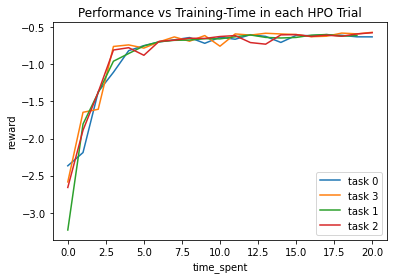

In [3]:
import autogluon as ag
from autogluon import TextPrediction as task

predictor_score = task.fit(train_data, label='score',
                           time_limits=60, ngpus_per_trial=1, seed=123,
                           output_directory='./ag_sts_mixed_score')

In [4]:
score = predictor_score.evaluate(dev_data, metrics='spearmanr')
print('Spearman Correlation=', score['spearmanr'])

Spearman Correlation= 0.8612579192204954


In addition, we can also train a model that predicts the `genre` with the other columns

2020-08-02 09:41:39,290 - root - INFO - All Logs will be saved to ./ag_sts_mixed_genre/ag_text_prediction.log
2020-08-02 09:41:39,312 - root - INFO - Train Dataset:
2020-08-02 09:41:39,312 - root - INFO - Columns:

- Text(
   name="sentence1"
   #total/missing=4886/0
   length, min/avg/max=16/57.94/367
)
- Text(
   name="sentence2"
   #total/missing=4886/0
   length, min/avg/max=15/57.80/311
)
- Categorical(
   name="genre"
   #total/missing=4886/0
   num_class (total/non_special)=3/3
   categories=['main-captions', 'main-forums', 'main-news']
   freq=[1699, 382, 2805]
)
- Numerical(
   name="score"
   #total/missing=4886/0
   shape=()
)


2020-08-02 09:41:39,313 - root - INFO - Tuning Dataset:
2020-08-02 09:41:39,313 - root - INFO - Columns:

- Text(
   name="sentence1"
   #total/missing=863/0
   length, min/avg/max=16/56.41/265
)
- Text(
   name="sentence2"
   #total/missing=863/0
   length, min/avg/max=16/56.04/256
)
- Categorical(
   name="genre"
   #total/missing=863/0
   num_clas

 60%|█████▉    | 367/612 [01:01<00:41,  5.95it/s]


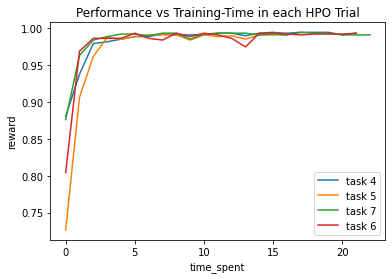

In [5]:
predictor_genre = task.fit(train_data, label='genre',
                           time_limits=60, ngpus_per_trial=1, seed=123,
                           output_directory='./ag_sts_mixed_genre')

In [6]:
score = predictor_genre.evaluate(dev_data, metrics='acc')
print('Genre Accuracy = {}%'.format(score['acc'] * 100))

Genre Accuracy = 84.93333333333334%
